<a href="https://colab.research.google.com/github/nh0875/Desafios-Procesamiento-del-Habla-974/blob/main/Desafio_Clasificacion_(Mesothelioma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Elegi el Dataset Mesothelioma Disease, el dataset trata sobre pacientes que fueron diagosticados y tratados en este tipo de cancer, https://archive.ics.uci.edu/dataset/351/mesothelioma+s+disease+data+set*

# Dataset Mesothelioma Diseas
Es un data set real con datos sobre pacientes diagosticados y tratados por el tipo de Cancer Mesotelioma, con 324x34


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt


#Convierto el xlsx a un dataframe
df=pd.read_excel('/content/Mesothelioma data set.xlsx')
print(df.to_string())

      age  gender  city  asbestos exposure  type of MM  duration of asbestos exposure  diagnosis method  keep side  cytology  duration of symptoms  dyspnoea  ache on chest  weakness  habit of cigarette  performance status  white blood  cell count (WBC)  hemoglobin (HGB)  platelet count (PLT)  sedimentation  blood lactic dehydrogenise (LDH)  alkaline phosphatise (ALP)  total protein  albumin  glucose  pleural lactic dehydrogenise  pleural protein  pleural albumin  pleural glucose  dead or not  pleural effusion  pleural thickness on tomography  pleural level of acidity (pH)  C-reactive protein (CRP)  class of diagnosis
0    47.0     1.0   0.0                1.0         0.0                           20.0               1.0        0.0       1.0                  24.0       1.0            1.0       0.0                 2.0                 1.0       8050.0               9.0               1.0                 274.0           60.0                             258.0                        65.0      

# Preprocesamiento
El objetivo de mis modelos de clasificacion es saber que tan buenos son para indetificar la clase de diagnostico que se le deberia dar al paciente, es una clasificacion binaria ya que solo hay dos clases (1,2). No utilizare Cross Validation solo dividire el dataset en Train y Test


In [80]:
# Detección y eliminación de outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

#En la documentacion del dataset se indica que no posee valores NaN, igualmente lo verifique y es cierto que no posee valores NaN, por lo que es innecesario hacer un .dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores faltantes en X y y
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Entrenamiento de los Modelos (Arbol de Decision y K-Neighbors)
El modelo que elegi para alterar su hiperparametro y evaluar su desempeño sera el K-Neighbors

In [81]:
# Entrenar el modelo K-Neighbors con los distintos hiperparametros (3,9,18)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train, y_train)
knn3 = KNeighborsClassifier(n_neighbors=12)
knn3.fit(X_train, y_train)
knn4 = KNeighborsClassifier(n_neighbors=15)
knn4.fit(X_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors=18)
knn5.fit(X_train, y_train)
knn6 = KNeighborsClassifier(n_neighbors=50)
knn6.fit(X_train, y_train)

# Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluacion de los Modelos
Voy a utilizar las metricas Recall y Precision, puntualmente quise usar estas metricas porque al estar hablando de diagnosticos, es muy importante verificar que no hayan diagosticos falsos positivos o falsos negativo, ya que se trataria a la persona como si tubiera este tipo de cancer y es muy costoso tanto en dinero como en reputacion para el hospital, el otro caso seria haber diagosticado como negativo a una persona que si posee Mesotelioma lo cual seria letal para el enfermo como tambien asi pesimo para la reputacion del hospital

In [82]:
# Realizar predicciones
y_preds = {
    'knn1': knn1.predict(X_test),
    'knn2': knn2.predict(X_test),
    'knn3': knn3.predict(X_test),
    'knn4': knn4.predict(X_test),
    'knn5': knn5.predict(X_test),
    'knn6': knn6.predict(X_test),
    'tree': tree.predict(X_test)
}

for model_name, y_pred in y_preds.items():
    Recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nModelo: {model_name}")
    print(f"Recall: {Recall}")
    print(f"Precision: {precision}")
    print(f"Matriz de Confusión:\n{conf_matrix}")

    print(f"\nModelo: {model_name}")
    print(f"Recall: {Recall}")
    print(f"Precision: {precision}")
    print(f"Matriz de Confusión:\n{conf_matrix}")


Modelo: knn1
Recall: 0.5
Precision: 0.5879120879120879
Matriz de Confusión:
[[10 10]
 [ 4  2]]

Modelo: knn1
Recall: 0.5
Precision: 0.5879120879120879
Matriz de Confusión:
[[10 10]
 [ 4  2]]

Modelo: knn2
Recall: 0.85
Precision: 0.6520979020979021
Matriz de Confusión:
[[17  3]
 [ 5  1]]

Modelo: knn2
Recall: 0.85
Precision: 0.6520979020979021
Matriz de Confusión:
[[17  3]
 [ 5  1]]

Modelo: knn3
Recall: 1.0
Precision: 0.591715976331361
Matriz de Confusión:
[[20  0]
 [ 6  0]]

Modelo: knn3
Recall: 1.0
Precision: 0.591715976331361
Matriz de Confusión:
[[20  0]
 [ 6  0]]

Modelo: knn4
Recall: 0.95
Precision: 0.5846153846153845
Matriz de Confusión:
[[19  1]
 [ 6  0]]

Modelo: knn4
Recall: 0.95
Precision: 0.5846153846153845
Matriz de Confusión:
[[19  1]
 [ 6  0]]

Modelo: knn5
Recall: 1.0
Precision: 0.591715976331361
Matriz de Confusión:
[[20  0]
 [ 6  0]]

Modelo: knn5
Recall: 1.0
Precision: 0.591715976331361
Matriz de Confusión:
[[20  0]
 [ 6  0]]

Modelo: knn6
Recall: 1.0
Precision: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


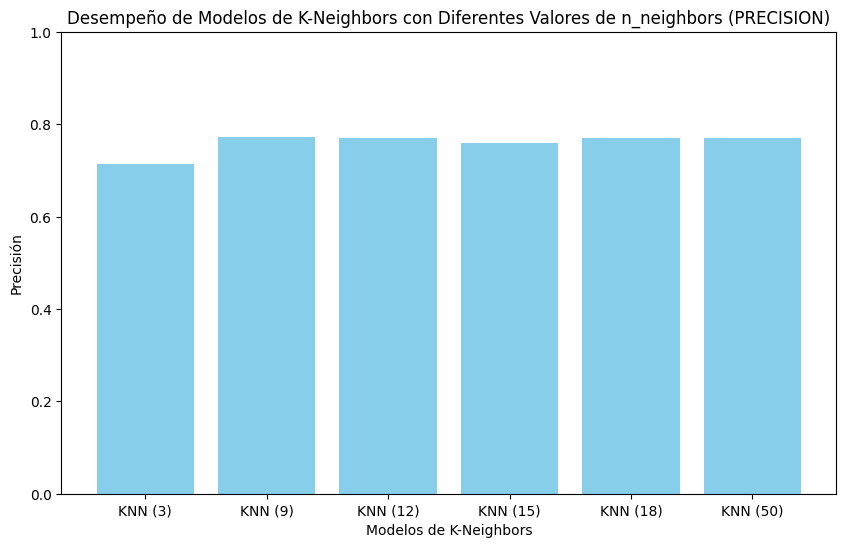

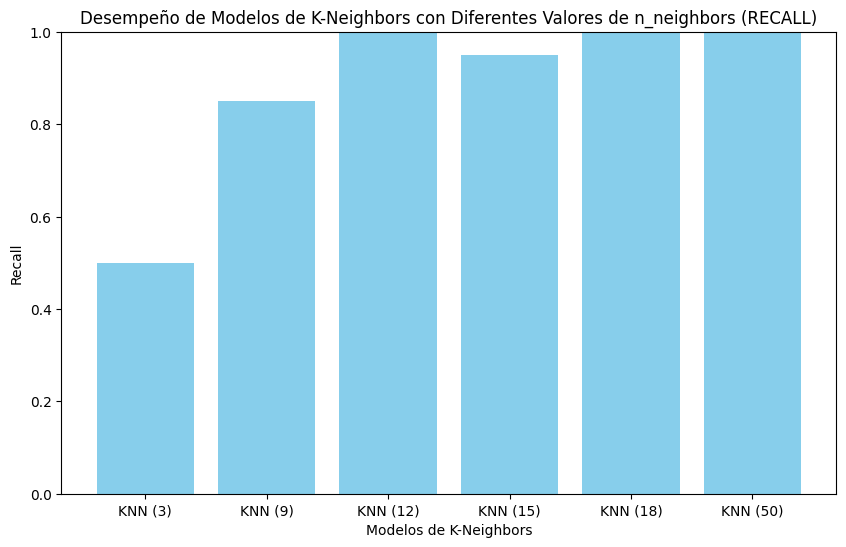

In [85]:
# Lista de modelos KNN y sus nombres
knn_models = [knn1, knn2, knn3, knn4, knn5, knn6]
model_names = ["KNN (3)", "KNN (9)", "KNN (12)", "KNN (15)", "KNN (18)", "KNN (50)"]

# Calcular la precisión (accuracy) para cada modelo de KNN
accuracies = [precision_score(y_test, model.predict(X_test)) for model in knn_models]
recalls = [recall_score(y_test, model.predict(X_test)) for model in knn_models]

# Crear gráfico de barras para la precisión de cada modelo
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Modelos de K-Neighbors")
plt.ylabel("Precisión")
plt.title("Desempeño de Modelos de K-Neighbors con Diferentes Valores de n_neighbors (PRECISION)")
plt.show()
# Creo otro grafico para medir el Recall
plt.figure(figsize=(10, 6))
plt.bar(model_names, recalls, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Modelos de K-Neighbors")
plt.ylabel("Recall")
plt.title("Desempeño de Modelos de K-Neighbors con Diferentes Valores de n_neighbors (RECALL)")
plt.show()

# Modelo K-neighbors elegido
Mi modelo candidato de k-Neighbors seria el que tiene como hiperparametro "n" = 12, ya que a partir de este punto el modelo tiene el mismo desempeño a exepcion del "n"=15 ya que baja un poco el valor de la metrica de Precision y en Recall


# Analisis de Experiencia
Me encanto trabajar este dataset sinceramente, me encantaria en mi futuro como profesional de la ciencia de datos trabajar en un hospital con estos tipos de datos, ya que me encanta ayudar a las personas